In [1]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5612\4020264590.py:6: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5612\4020264590.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [2]:
#Run the following wget command line in the terminal to download dataset as spacex_launch_dash.csv
! wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

--2023-12-20 11:18:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2476 (2.4K) [text/csv]
Saving to: 'spacex_launch_dash.csv'

     0K ..                                                    100%  122M=0s

2023-12-20 11:18:07 (122 MB/s) - 'spacex_launch_dash.csv' saved [2476/2476]



In [3]:
#Download a skeleton Dash app to be completed in this lab:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"

--2023-12-20 11:18:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2110 (2.1K) [text/x-python]
Saving to: 'spacex_dash_app.py'

     0K ..                                                    100%  110M=0s

2023-12-20 11:18:26 (110 MB/s) - 'spacex_dash_app.py' saved [2110/2110]



In [2]:
# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

In [13]:
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [10]:
Launch_Sites= spacex_df.groupby(['Launch Site'])['Payload Mass (kg)'].sum()
Launch_Sites

Launch Site
CCAFS LC-40     67363.00
CCAFS SLC-40    24616.65
KSC LC-39A      56894.65
VAFB SLC-4E     58138.00
Name: Payload Mass (kg), dtype: float64

In [36]:
entered_site = 'CCAFS LC-40'
filtered_df = spacex_df[spacex_df['Launch Site']==str(entered_site)]
filtered_df

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0
5,5,7,CCAFS LC-40,0,3170.0,F9 v1.1,v1.1
6,6,8,CCAFS LC-40,0,3325.0,F9 v1.1,v1.1
7,7,9,CCAFS LC-40,0,2296.0,F9 v1.1,v1.1
8,8,10,CCAFS LC-40,0,1316.0,F9 v1.1,v1.1
9,9,11,CCAFS LC-40,0,4535.0,F9 v1.1,v1.1


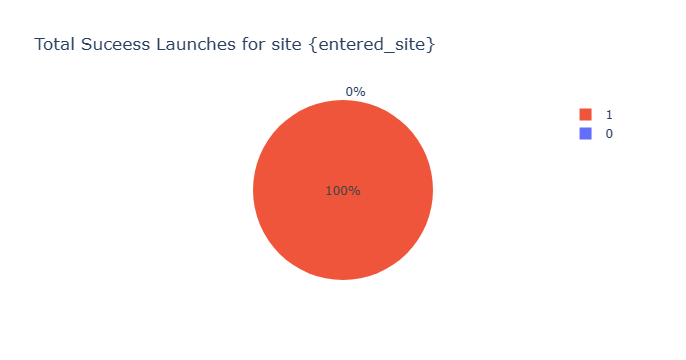

In [45]:
fig = px.pie(data_frame=filtered_df,values="class",names="class",color='class',title="Total Suceess Launches for site {entered_site}")
fig.show()

In [33]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',  options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},{'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},{'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},{'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'}],value = 'ALL', placeholder='Select a Launch Site Here', searchable=True),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',min=0, max=10000, step=1000, marks={0: '0', 100: '100'}, value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback( Output(component_id='success-pie-chart', component_property='figure'),
               Input(component_id='site-dropdown', component_property='value'))

def get_pie_chart(entered_site):
    filtered_df = spacex_df[spacex_df['Launch Site']==str(entered_site)]
    if entered_site == 'ALL':
        fig = px.pie(spacex_df, values='class', names='Launch Site', title='Total Sucess Launches by Site')
        return fig
    else:
        fig = px.pie(filtered_df,values='class',names='class',title='Total Suceess Launches for site')
        return fig
    
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback( Output(component_id='success-payload-scatter-chart', component_property='figure'),
               Input(component_id='site-dropdown', component_property='value'),Input(component_id='payload-slider', component_property='value'))

def get_scatter_chart(entered_site, payload_range):
    low, high = payload_range
    mask = (spacex_df['Payload Mass (kg)']> low)&(spacex_df['Payload Mass (kg)']< high)
    filtered_df = spacex_df[mask]
    
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category', title='Correlation between Payload and Success for all Sites')
        return fig
    else:
        filtered_df1 = filtered_df[filtered_df['Launch Site']==str(entered_site)]
        fig = px.scatter(filtered_df1, x='Payload Mass (kg)',y='class',color='Booster Version Category',title='Correlation between Payload and Success for site {entered_site}')
        return fig




# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)